<a href="https://colab.research.google.com/github/loopp45654/big-data/blob/master/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(SportsAnalytics)


In [7]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")

In [9]:
install.packages("ggpolt2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggpolt2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


`geom_smooth()` using formula 'y ~ x'



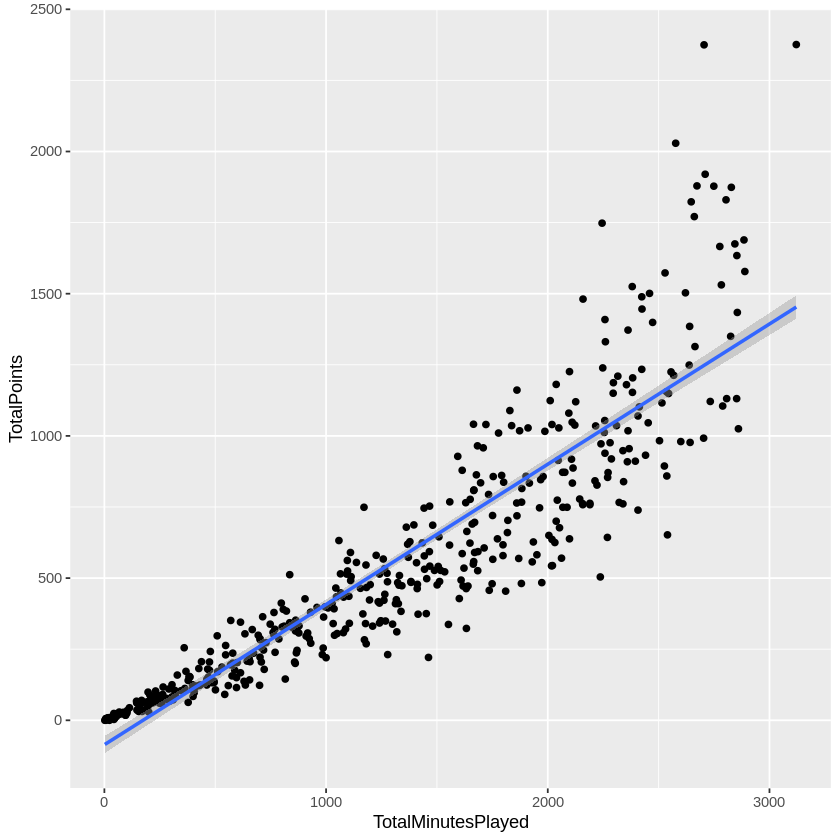

In [10]:
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")

In [13]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1516)



Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1516)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -85.9071              0.4931  


In [14]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data=NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -1.799e+01           -2.347e-04            1.256e+00  

Degrees of Freedom: 475 Total (i.e. Null);  473 Residual
Null Deviance:	    99360000 
Residual Deviance: 2160000 	AIC: 5367

In [15]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data=NBA1516)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          22.852223            -0.006537             1.275721  
         PositionPF           PositionPG           PositionSF  
         -39.416327           -65.034646           -38.522299  
         PositionSG  
         -52.175144  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    99080000 
Residual Deviance: 1975000 	AIC: 5322

In [22]:
mydata<- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [23]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [24]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit ~ gre + gpa + rank,
data = mydata, family = "binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [25]:
OneVar<-glm(TotalPoints~TotalMinutesPlayed,data =NBA1516)
TwoVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,

data =NBA1516)

ThreeVar<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,

data =NBA1516)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6338.913 5366.763 5321.972

In [26]:
sum2<-summary(TwoVar)
sum2$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.798855e+01,5.659758251,-3.17832538,1.578333e-03
TotalMinutesPlayed,-2.347183e-04,0.009474631,-0.02477334,9.802462e-01
FieldGoalsAttempted,1.255794e+00,0.022239494,56.46682752,2.474028e-212


In [27]:
sum3<-summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),22.852222668,9.014714391,2.5349913,1.156964e-02
TotalMinutesPlayed,-0.006536874,0.009199968,-0.7105322,4.777281e-01
FieldGoalsAttempted,1.275721212,0.021647176,58.9324535,1.144607e-218
PositionPF,-39.416326742,9.936541704,-3.9668053,8.425605e-05
PositionPG,-65.034646215,10.269250388,-6.3329497,5.648565e-10
PositionSF,-38.522298887,10.488170409,-3.6729284,2.674727e-04
PositionSG,-52.175143670,9.985331185,-5.2251791,2.625062e-07


In [28]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(rpart)
DT<-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1516)

In [30]:
DT

n=475 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 475 364 PF (0.15 0.23 0.21 0.18 0.23)  
    2) ThreesMade< 2.5 132  74 C (0.44 0.35 0.098 0.053 0.061)  
      4) Blocks>=4.5 89  37 C (0.58 0.38 0.011 0.011 0.011) *
      5) Blocks< 4.5 43  31 PF (0.14 0.28 0.28 0.14 0.16)  
       10) Steals< 2.5 29  19 PF (0.17 0.34 0.14 0.21 0.14) *
       11) Steals>=2.5 14   6 PG (0.071 0.14 0.57 0 0.21) *
    3) ThreesMade>=2.5 343 242 SG (0.035 0.19 0.25 0.23 0.29)  
      6) Assists>=170.5 96  39 PG (0.031 0.052 0.59 0.15 0.18) *
      7) Assists< 170.5 247 163 SG (0.036 0.24 0.12 0.26 0.34)  
       14) Blocks>=20.5 80  42 PF (0.062 0.48 0 0.26 0.2)  
         28) Steals< 59.5 58  21 PF (0.069 0.64 0 0.14 0.16) *
         29) Steals>=59.5 22   9 SF (0.045 0.045 0 0.59 0.32) *
       15) Blocks< 20.5 167  99 SG (0.024 0.13 0.17 0.26 0.41)  
         30) Assists< 81.5 110  68 SG (0.027 0.18 0.091 0.32 0.38)  
        

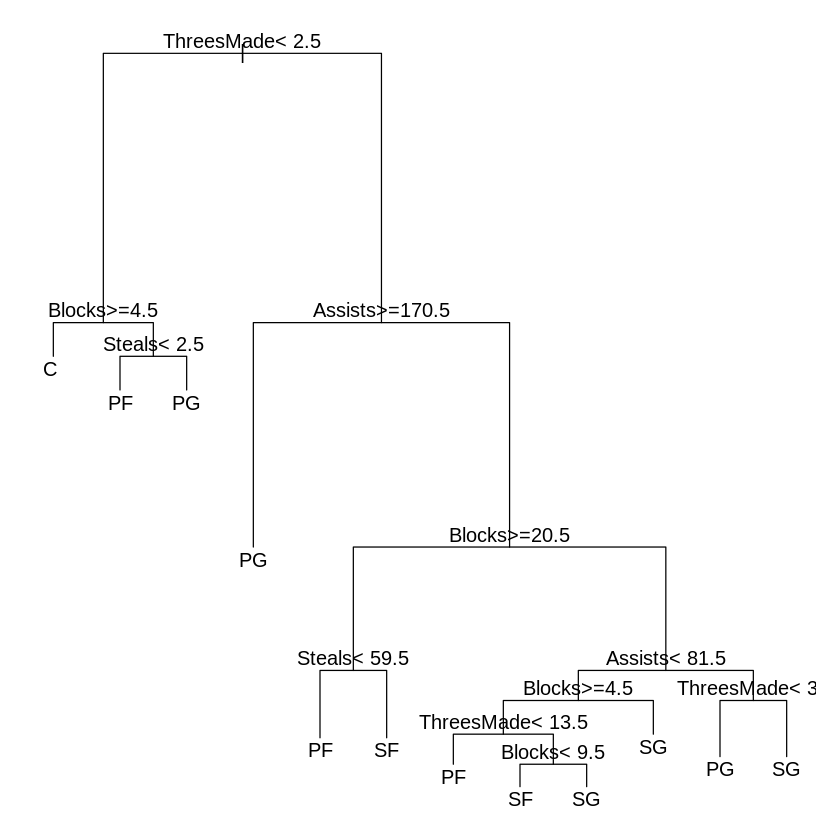

In [31]:
par(mfrow=c(1,1), mar = rep(1,4)) #下,左,上,右
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [32]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



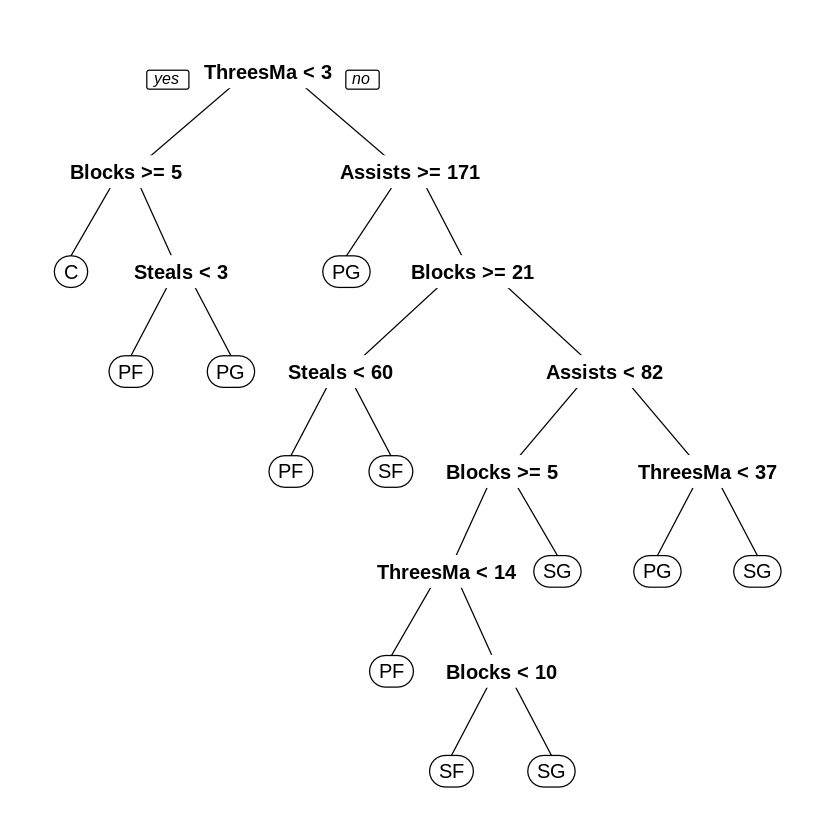

In [33]:
library(rpart.plot)
prp(DT)

In [34]:
mtcars.mxs<-as.matrix(mtcars)
d<-dist(mtcars.mxs) 
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

In [35]:
d<-dist(mtcars.mxs, method="manhattan") 
head(d)

[1]   0.815  79.300 108.795 275.430  84.640 347.960

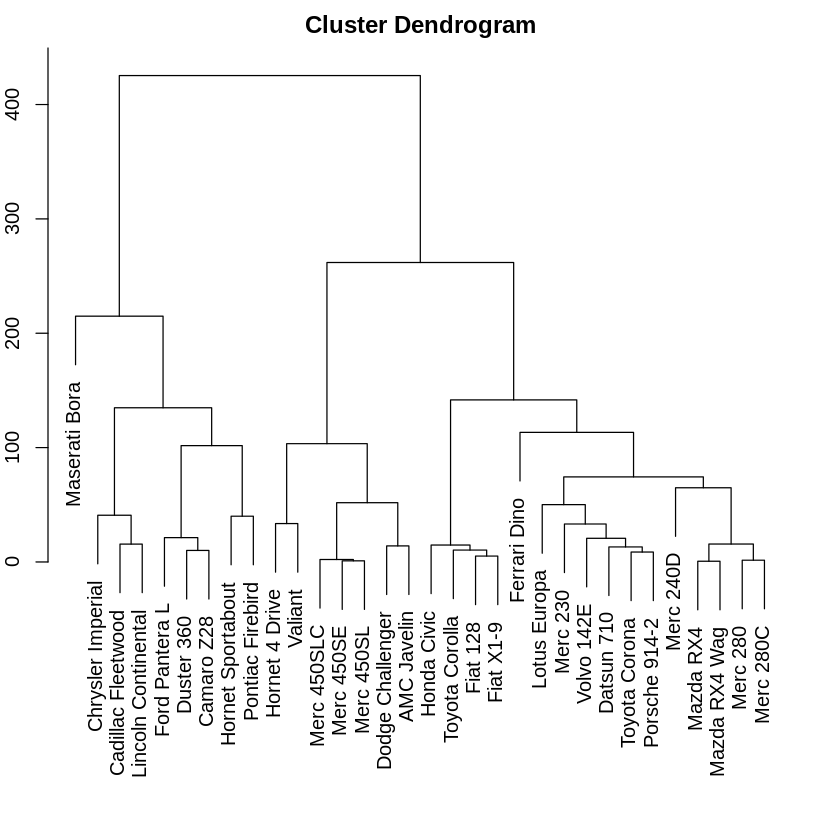

In [36]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs))
plot(hc)

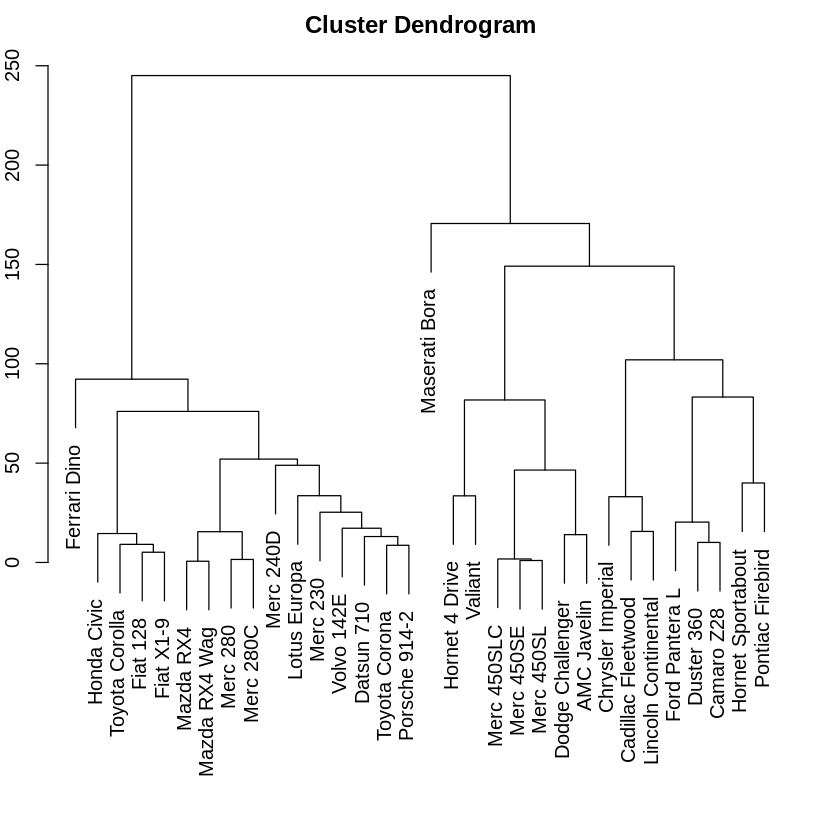

In [37]:
par(mar=rep(2,4),mfrow=c(1,1))
hc<-hclust(dist(mtcars.mxs),method="average") 
plot(hc)

In [38]:
clusterCut <- cutree(hc, k=5) 
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive             Valiant          Merc 450SE          Merc 450SL 
                  2                   2                   2                   2 
        Merc 450SLC    Dodge Challenger         AMC Javelin   Hornet Sportabout 
                  2                   2                   2                   3 
         Duster 360          Camaro Z28    Pontiac Firebird      Ford Pantera L 
                  3                   3                   3                   3 
 Cadillac Fleetwood Lincoln Continental   Chrysler Imperial       Maserati Bora 
                  4                   4                   4                   5

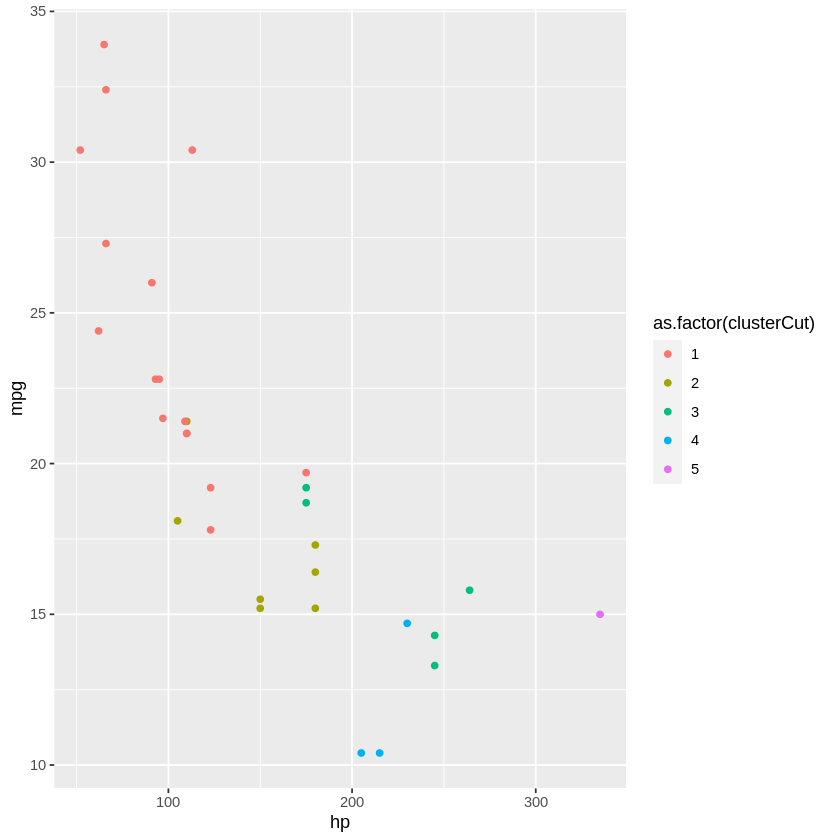

In [39]:
ggplot()+geom_point(data=mtcars,

aes(x=hp,y=mpg,color=as.factor(clusterCut)))

In [40]:
clusterCut <- cutree(hc,h =4)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

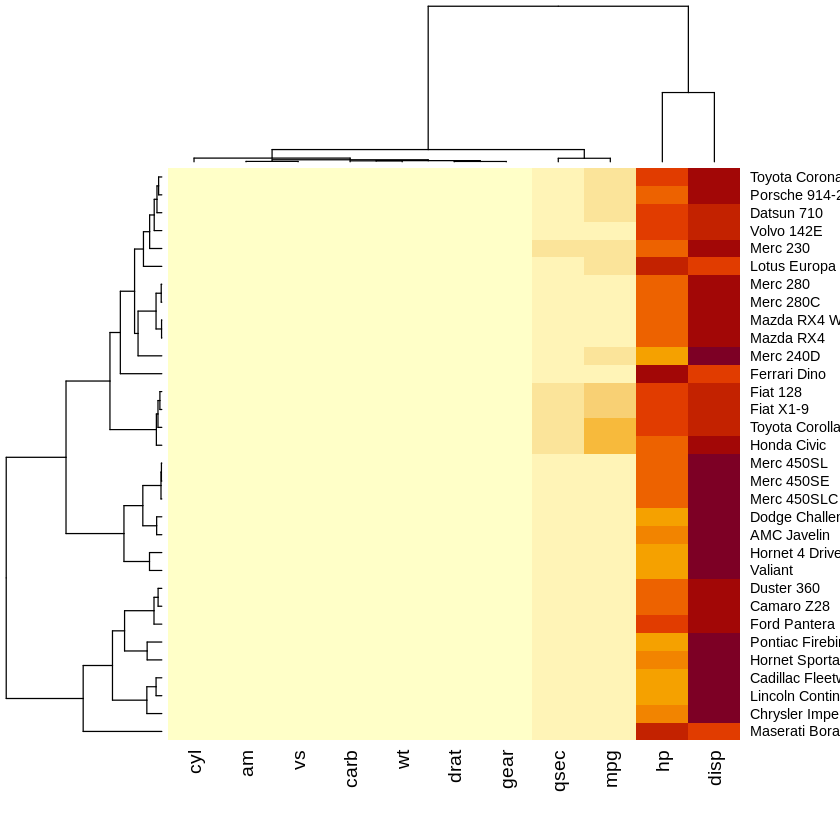

In [41]:
par(mar=rep(0.2,4),mfrow=c(1,1))
heatmap(mtcars.mxs)

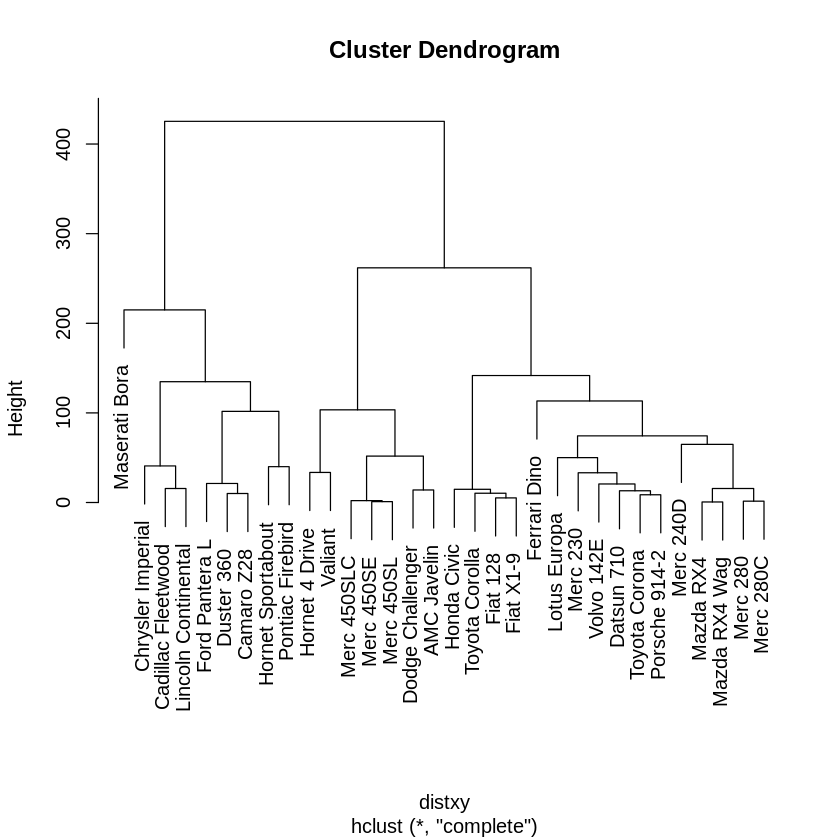

In [42]:
distxy <- dist(mtcars.mxs)
hClustering <- hclust(distxy)
plot(hClustering)

ERROR: ignored

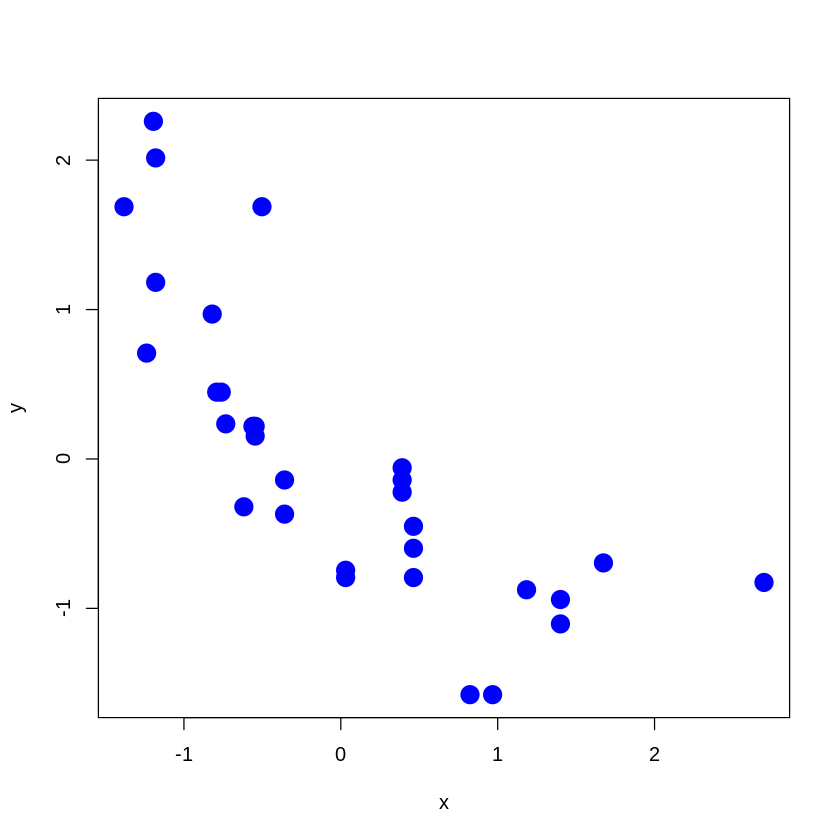

In [43]:
x<-scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [44]:
dataFrame <- data.frame(x,y)
kmeansObj <- kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

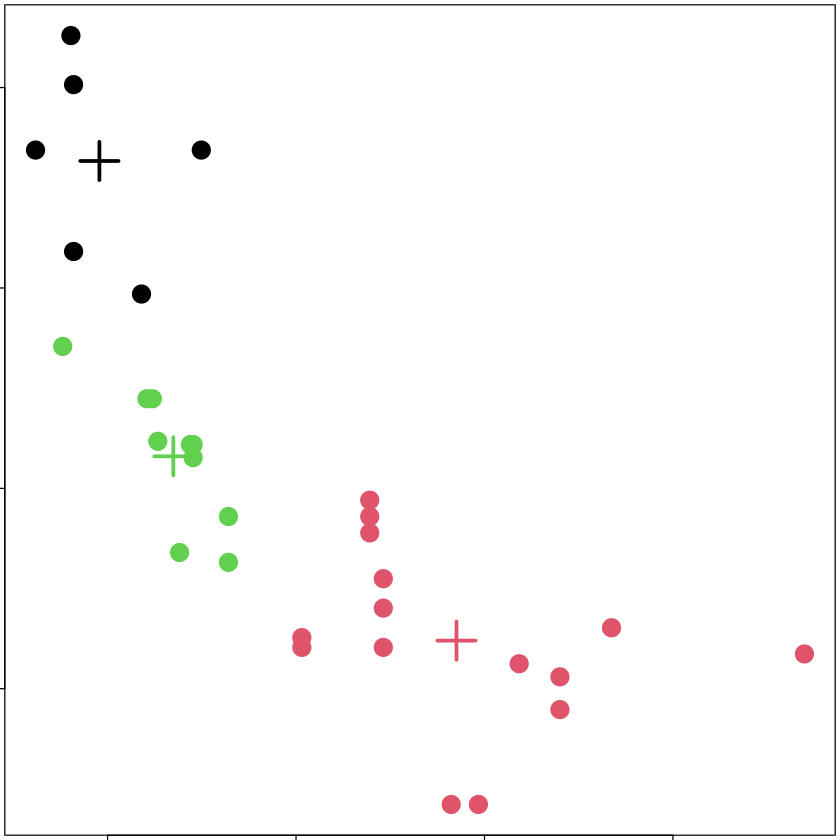

In [45]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

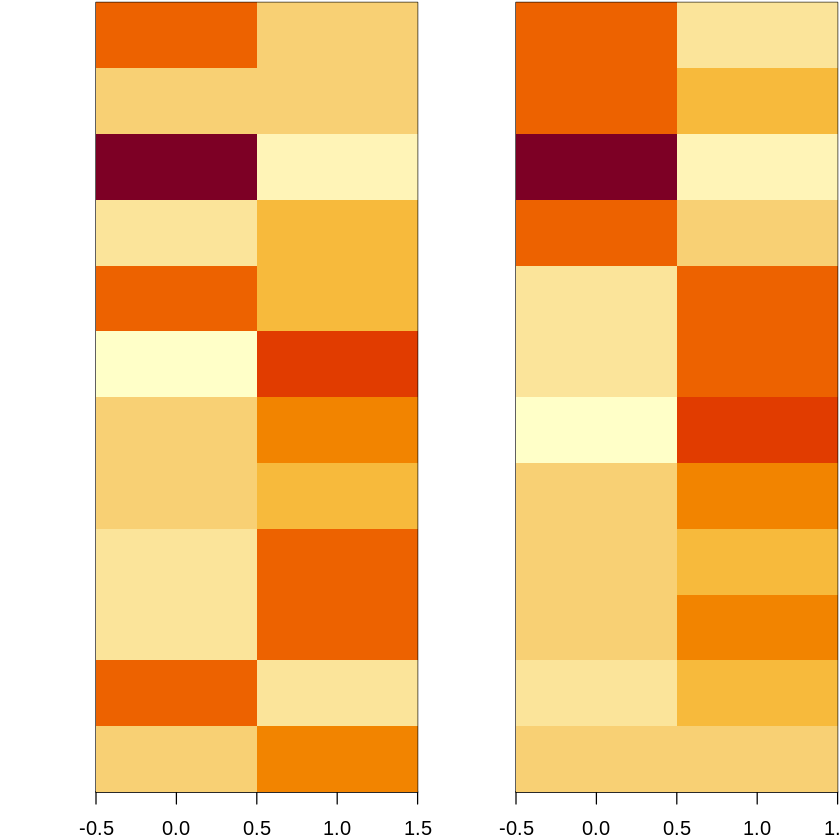

In [46]:
set.seed(1234)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
kmeansObj <- kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [48]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [49]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [50]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [51]:
rulesR<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [52]:
rulesL<-apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [54]:
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [56]:
if (!require('arulesViz')){
install.packages("arulesViz");
library(arulesViz)
}
#Mac->http://planspace.org/2013/01/17/fix-r-tcltk-dependency-problem-on-mac/
plot(rules,method="graph",interactive=TRUE,shading=NA) #會跑一陣子

Warning message in plot.rules(rules, method = "graph", interactive = TRUE, shading = NA):
“The parameter interactive is deprecated. Use engine='interactive' instead.”
Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


ERROR: ignored

In [57]:
install.packages('prophet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘inline’, ‘RcppParallel’, ‘loo’, ‘V8’, ‘dygraphs’, ‘extraDistr’, ‘rstan’, ‘rstantools’, ‘xts’, ‘RcppEigen’, ‘StanHeaders’


Warning message in install.packages("prophet"):
“installation of package ‘V8’ had non-zero exit status”
Warning message in install.packages("prophet"):
“installation of package ‘rstan’ had non-zero exit status”
Warning message in install.packages("prophet"):
“installation of package ‘prophet’ had non-zero exit status”


In [58]:
library(prophet)
library(dplyr)
df <- read.csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/
mutate(y = log(y))
m <- prophet(df)
future <- make_future_dataframe(m, periods = 365)
tail(future)
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])
plot(m, forecast)
prophet_plot_components(m, forecast)

ERROR: ignored

In [59]:
devtools::install_github("rstudio/tensorflow")

rappdirs   (NA    -> 0.3.1) [CRAN]
jsonlite   (1.7.1 -> 1.7.2) [CRAN]
reticulate (NA    -> 1.18 ) [CRAN]
config     (NA    -> 0.3  ) [CRAN]
ps         (1.4.0 -> 1.5.0) [CRAN]
tfruns     (NA    -> 1.4  ) [CRAN]


Installing 6 packages: rappdirs, jsonlite, reticulate, config, ps, tfruns

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp2yvGd0/remotes3620ae8528/rstudio-tensorflow-ef1e970/DESCRIPTION’
─  preparing ‘tensorflow’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘tensorflow_2.2.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
library(tensorflow)
sess = tf$Session()
hello <- tf$constant('Hello, TensorFlow!')
sess$run(hello)

ERROR: ignored

In [ ]:
install.packages("drat", repos="https://cran.rstudio.com")
drat:::addRepo("dmlc")
install.packages("mxnet")

In [ ]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)}

In [ ]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")
NBA1516<-NBA1516[complete.cases(NBA1516),]

In [61]:
sample(1:10,3)

[1] 6 1 2

In [62]:
sample(1:nrow(NBA1516),nrow(NBA1516)/3)

[1] 241 381 476 255 305 298  74 320  28 376 200  38 396 143 154 374  61 129
 [19] 214 316  24 260  44 346   1 356  73 221 151 406 463 196 310 384 236  32
 [37] 287  55 273 262 256 213 197 297  76 355 456 109 458 144 202  65  20  35
 [55] 367 365 337 277 171 379 191 459  26 204  10 150 114  86  11 258 422 161
 [73] 307 393   4  91 205 284  50  80 291 113  79 145 187 398 134 395 250  39
 [91]  43 388 182 468 363 106 428 347 362 267 117  81  23 279   8 317 265   7
[109]  49 137 195  98  78 465  64  88  48  15 235 324 131   5 344 449 207  12
[127] 288 247 139 176 425 331 188  70 368 457 369 125 157  13 420  85 289  42
[145] 132 352 121 126 471  83 163  94 285 146  57 217 225 464

In [63]:
NBA1516$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1516[sample(1:nrow(NBA1516),nrow(NBA1516)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1516$Test==F),sum(NBA1516$Test==T))

[1] 318 158

In [64]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1516[NBA1516$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.798,7.7912,1.0,3.2e-01
TotalMinutesPlayed,0.013,0.0069,1.9,5.3e-02
FieldGoalsAttempted,0.973,0.0220,44.3,6.7e-136
PositionPF,-16.108,8.1997,-2.0,5.0e-02
PositionPG,-42.779,8.7855,-4.9,1.8e-06
PositionSF,-22.669,8.9768,-2.5,1.2e-02
PositionSG,-23.514,9.2318,-2.5,1.1e-02
ThreesAttempted,0.108,0.0305,3.5,4.6e-04
FreeThrowsAttempted,0.752,0.0375,20.1,6.2e-58


In [65]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.798,7.7912,1.0,3.2e-01
TotalMinutesPlayed,0.013,0.0069,1.9,5.3e-02
FieldGoalsAttempted,0.973,0.0220,44.3,6.7e-136
PositionPF,-16.108,8.1997,-2.0,5.0e-02
PositionPG,-42.779,8.7855,-4.9,1.8e-06
PositionSF,-22.669,8.9768,-2.5,1.2e-02
PositionSG,-23.514,9.2318,-2.5,1.1e-02
ThreesAttempted,0.108,0.0305,3.5,4.6e-04
FreeThrowsAttempted,0.752,0.0375,20.1,6.2e-58


In [66]:
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.798,7.7912,1.0,3.2e-01
TotalMinutesPlayed,0.013,0.0069,1.9,5.3e-02
FieldGoalsAttempted,0.973,0.0220,44.3,6.7e-136
PositionPF,-16.108,8.1997,-2.0,5.0e-02
PositionPG,-42.779,8.7855,-4.9,1.8e-06
PositionSF,-22.669,8.9768,-2.5,1.2e-02
PositionSG,-23.514,9.2318,-2.5,1.1e-02
ThreesAttempted,0.108,0.0305,3.5,4.6e-04
FreeThrowsAttempted,0.752,0.0375,20.1,6.2e-58


In [67]:
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.798,7.7912,1.0,3.2e-01
TotalMinutesPlayed,0.013,0.0069,1.9,5.3e-02
FieldGoalsAttempted,0.973,0.0220,44.3,6.7e-136
PositionPF,-16.108,8.1997,-2.0,5.0e-02
PositionPG,-42.779,8.7855,-4.9,1.8e-06
PositionSF,-22.669,8.9768,-2.5,1.2e-02
PositionSG,-23.514,9.2318,-2.5,1.1e-02
ThreesAttempted,0.108,0.0305,3.5,4.6e-04
FreeThrowsAttempted,0.752,0.0375,20.1,6.2e-58


In [68]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1516[NBA1516$Test==T,])

cor(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints) #相關係數

[1] NA

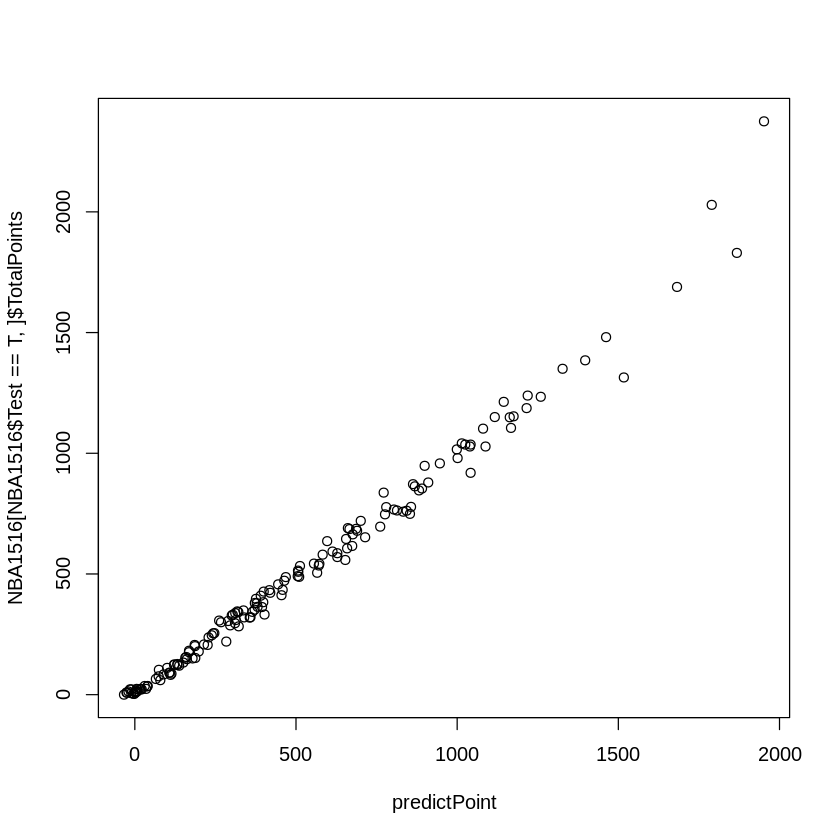

In [69]:
plot(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints)

In [70]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigData
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

ERROR: ignored

In [71]:
mydata$admit<-factor(mydata$admit,levels=c(0,1))

In [72]:
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata[mydata$Test==F,], family = "binomial")
finalFit<-stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)

ERROR: ignored

In [74]:
AdmitProb<-predict(finalFit, # 用Training set做的模型

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

head(AdmitProb)

ERROR: ignored

In [73]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit)

ERROR: ignored

In [75]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit)

ERROR: ignored

In [76]:
AdmitProb<-predict(finalFit,

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率
AdmitAns<-factor(ifelse(AdmitProb>0.5,1,0),levels=c(0,1))
str(AdmitAns)

ERROR: ignored

In [77]:
library(caret) # install.packages("caret") #計算參數的packages
sensitivity(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

ERROR: ignored

In [78]:
specificity(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")
posPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")
negPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

ERROR: ignored